In [1]:
# last step: save the exp object to a pkl file
import pickle
import sys 
sys.path.append('codes')
from scipy.optimize import curve_fit
import MyFunctions as mf
import matplotlib.pyplot as plt
import rixs_tools as rt
from scipy.signal import convolve
import numpy as np
from rixs_experiment import RIXS_EXP 
#System = rt.create_system()


folder = 'processed_data/'
filename = 'processed_exp.pkl'

with open(folder+filename, 'rb') as input_file:
    exp = pickle.load(input_file)



In [2]:
def chi_square(z_data,z_fitting):
    diff = z_data - z_fitting
    diff_square = diff**2
    return np.sum(diff_square)

In [3]:
np.shape(Y)

NameError: name 'Y' is not defined

In [ ]:
np.argwhere((y_temp > -30)&(y_temp<100))

array([[11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29],
       [30],
       [31],
       [32],
       [33],
       [34],
       [35],
       [36],
       [37],
       [38],
       [39],
       [40],
       [41],
       [42],
       [43],
       [44],
       [45]], dtype=int64)

In [ ]:
exp.q_list

array([0.05 , 0.1  , 0.15 , 0.18 , 0.2  , 0.22 , 0.23 , 0.24 , 0.25 ,
       0.26 , 0.27 , 0.28 , 0.287])

1.8102
5.3444
8.9648
13.361


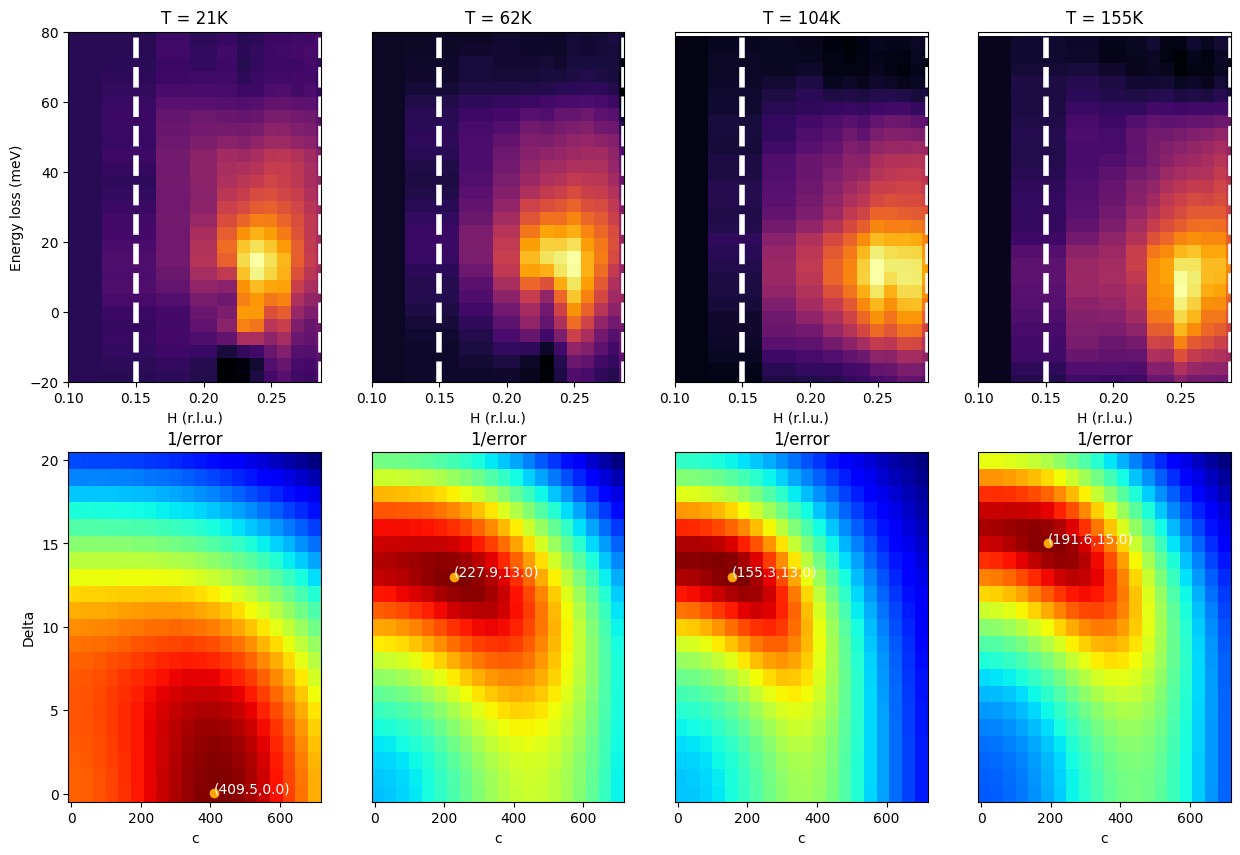

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [27]:
c_set = np.linspace(10,700,20)
Delta_set = np.linspace(0.01,20,21)
q_list =  exp.q_list
q_interest_list = [2,3,4,5,6,7,8,9,10,11,12]
chi_mesh = np.zeros((len(c_set),len(Delta_set)))
Gamma = 20

energy_min = -20
energy_max = 80




fig4, ax4 = plt.subplots(2,4,figsize=(15,10))
#fig2, ax2 = plt.subplots(len(q_interest_list),1,figsize=(5,2*len(q_interest_list)))

for temperature_index in range(4):
    temperature_char = exp._temperature_list_string[temperature_index]
    temperature = exp._temperature_list_K[temperature_index]
    temperature_meV = exp._temperature_list_meV[temperature_index]
    print(temperature_meV)
    # load data
    x= exp.Pure_CDF_data[temperature_char]['x']
    y_temp = exp.Pure_CDF_data[temperature_char]['y']
    cdf_temp = exp.Pure_CDF_data[temperature_char]['Z_extra_subtracted']
    X,Y = np.meshgrid(x,y_temp)
    y = y_temp[(y_temp > energy_min)&(y_temp<energy_max)]
    arg_list = np.argwhere((y_temp>energy_min)&(y_temp<energy_max))
    cdf = cdf_temp[arg_list[0][0]:arg_list[-1][0]+1,:]



    for c_index, c in enumerate(c_set):
        for Delta_index, Delta in enumerate(Delta_set):
            i_plot = 0
            sum_chi_square = 0
            for q_index, q in enumerate(q_list):
                z_data = cdf[:,q_index]
                z_fitting = mf.fun_S_convoluted(x[q_index],y, c_set[c_index], np.max(cdf[:,q_index]), Gamma, Delta_set[Delta_index], temperature_meV)
                if q_index in q_interest_list:
                    #ax2[i_plot].plot(y,z_data,'o')
                    #ax2[i_plot].plot(y,z_fitting,linewidth=4, alpha = 0.7)
                    #ax2[i_plot].set_title('q = '+str(q))
                    sum_chi_square = sum_chi_square + chi_square(z_data,z_fitting)
                    #if q_index != 12: ax2[i_plot].set_xticks([])
                    #i_plot = i_plot + 1
                
                chi_mesh[c_index,Delta_index] = np.sqrt(sum_chi_square)

    # plot the 3d surface and the pcolor plot of chi_square
    fig3 = plt.figure()
    C,D = np.meshgrid(c_set,Delta_set)

    ax4[0][temperature_index].pcolor(x,y,cdf,cmap='inferno')
    ax4[0][temperature_index].set_xlim([0.1,0.287])
    ax4[0][temperature_index].set_ylim([energy_min,energy_max])
    ax4[0][temperature_index].set_xlabel('H (r.l.u.)')
    ax4[0][temperature_index].set_yticks([])
    ax4[0][temperature_index].set_title('T = '+str(exp.temperature_list_K[temperature_index])+'K')
    ax4[0][temperature_index].axvline(x=q_list[q_interest_list[0]], color='white', linewidth=4, linestyle='--')
    ax4[0][temperature_index].axvline(x=q_list[q_interest_list[-1]], color='white', linewidth=4, linestyle='--')
    reward = 1/chi_mesh.T
    ax4[1][temperature_index].pcolor(C,D,reward,cmap='jet')
    ax4[1][temperature_index].set_xlabel('c')
    ax4[1][temperature_index].set_yticks([])
    if temperature_index == 0: 
        ax4[0][temperature_index].set_ylabel('Energy loss (meV)')
        ax4[0][temperature_index].set_yticks([energy_min,0,20,40,60,energy_max])
        ax4[1][temperature_index].set_ylabel('Delta')
        ax4[1][temperature_index].set_yticks([0,5,10,15,20])

    ax4[1][temperature_index].set_title('1/error')
    # find the highest reward, put a orange there 
    max_index = np.argwhere(reward == np.max(reward))
    ax4[1][temperature_index].scatter(C[reward==np.max(reward)],D[reward==np.max(reward)],color='orange')
    # write the c and delta coordinate as a text on the figure. keep only 1 decimal
    ax4[1][temperature_index].text(C[reward==np.max(reward)],D[reward==np.max(reward)],'('+str(round(C[reward==np.max(reward)][0],1))+','+str(round(D[reward==np.max(reward)][0],1))+')',color='white')

# save fig4
#fig4.savefig('figures/global_fit.jpg',dpi = 200)


In [ ]:
C[reward==np.max(reward)]

array([240.])

In [ ]:
np.shape(c_set)

(7,)

In [ ]:
np.shape(cdf_temp)

(61, 13)